# 🧠 Praktikum Computer Vision
## Topik: Image Segmentation

Dalam notebook ini, kita akan mempelajari beberapa metode segmentasi citra menggunakan Python dan OpenCV:

- Thresholding
- Canny Edge Detection
- K-means Clustering

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membuat citra sintetis: lingkaran putih di tengah
img = np.zeros((200, 200, 3), dtype=np.uint8)
cv2.circle(img, (100, 100), 50, (255, 255, 255), -1)

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [2]:
# Thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Deteksi tepi dengan Canny
edges = cv2.Canny(gray, 100, 200)

In [3]:
# Segmentasi dengan K-means
Z = img.reshape((-1, 3))
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(Z, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_img = centers[labels.flatten()].reshape((img.shape))

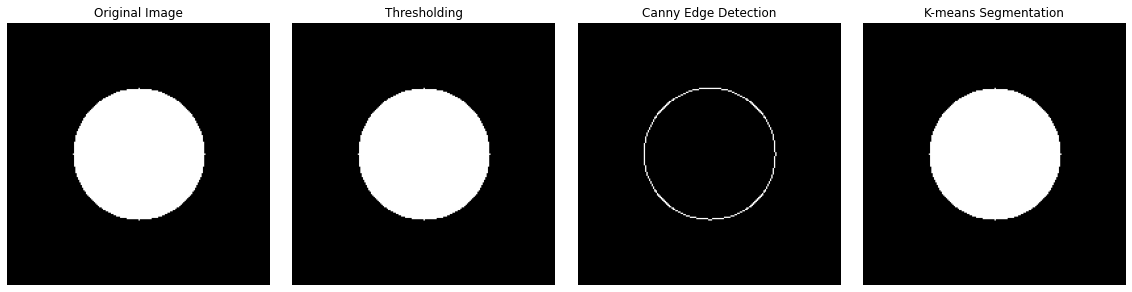

In [4]:
# Visualisasi semua hasil
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")

axs[1].imshow(thresh, cmap='gray')
axs[1].set_title("Thresholding")

axs[2].imshow(edges, cmap='gray')
axs[2].set_title("Canny Edge Detection")

axs[3].imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
axs[3].set_title("K-means Segmentation")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()